# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [33]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

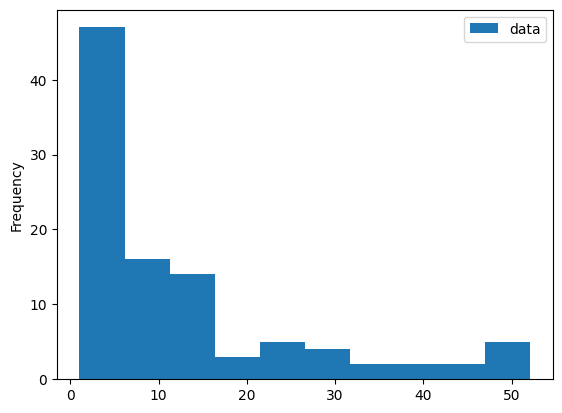

In [34]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

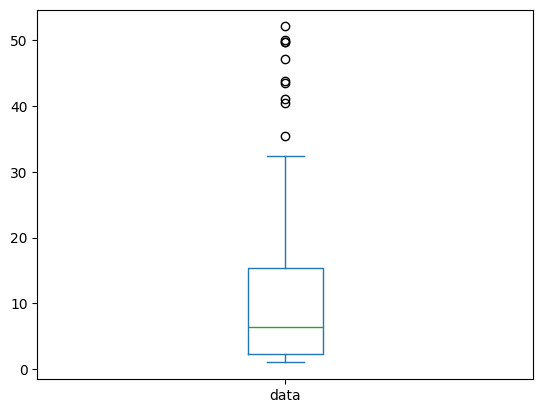

In [35]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

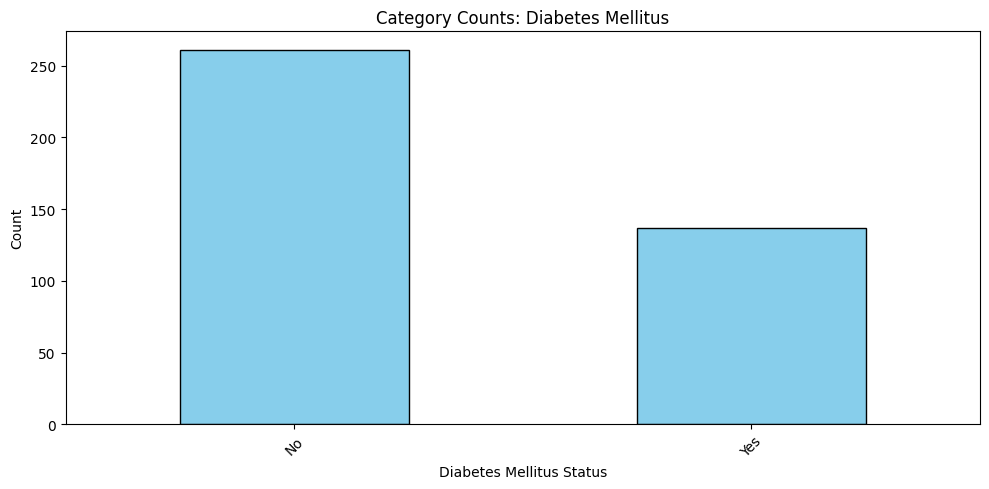

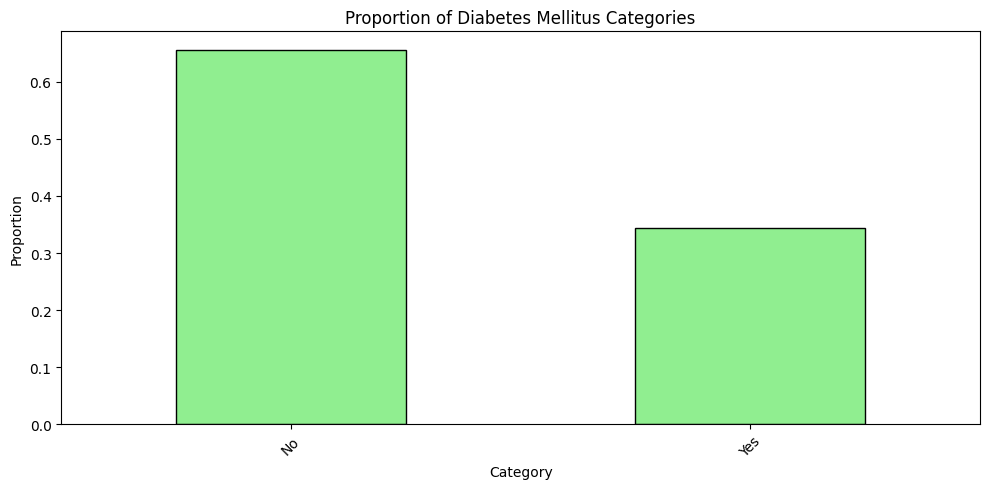

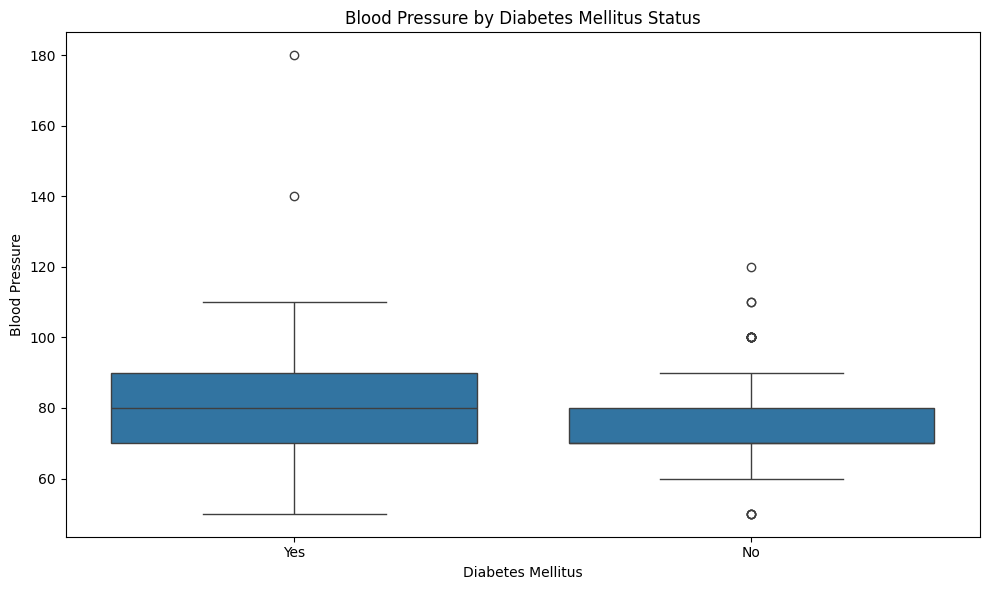

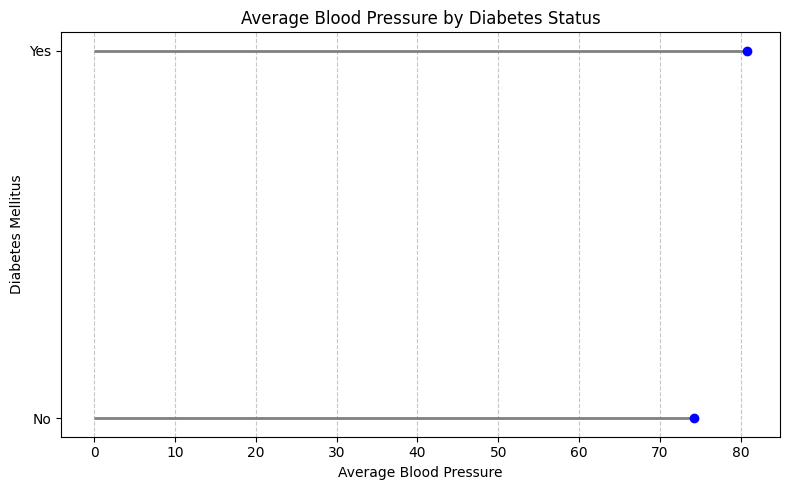

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/matthew-brett/cfd2020/master/data/ckd_full.csv"
df = pd.read_csv(url)

# Inspect data
df.head()
df.info()
df.describe()
df.isnull().sum()

# Clean and standardize categorical values in 'Diabetes Mellitus'
df['Diabetes Mellitus'] = df['Diabetes Mellitus'].str.strip().str.lower().str.capitalize()

# Plot category counts
plt.figure(figsize=(10, 5))
df['Diabetes Mellitus'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category Counts: Diabetes Mellitus')
plt.xlabel('Diabetes Mellitus Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot category proportions
plt.figure(figsize=(10, 5))
df['Diabetes Mellitus'].value_counts(normalize=True).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Proportion of Diabetes Mellitus Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for bivariate analysis with Blood Pressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes Mellitus', y='Blood Pressure', data=df)
plt.title('Blood Pressure by Diabetes Mellitus Status')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Blood Pressure')
plt.tight_layout()
plt.show()

# Storytelling With Data-style dot plot
# Reproducing a simplified dot plot from p. 60 of Storytelling With Data
means = df.groupby('Diabetes Mellitus')['Blood Pressure'].mean().sort_values()
categories = means.index
values = means.values

plt.figure(figsize=(8, 5))
plt.hlines(y=categories, xmin=0, xmax=values, color='gray', linewidth=2)
plt.plot(values, categories, "o", color='blue')
plt.title("Average Blood Pressure by Diabetes Status")
plt.xlabel("Average Blood Pressure")
plt.ylabel("Diabetes Mellitus")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##  Week 4 Summary: Univariate & Bivariate Analysis

This week's analysis focused on exploring the "Diabetes Mellitus" variable using univariate and bivariate techniques.

###  Key Insights from Univariate Analysis:
- The majority of patients in the dataset are classified as **not having diabetes**, showing a significant class imbalance.
- Inconsistent formatting in the "Diabetes Mellitus" column was resolved using string cleaning techniques.
- A categorical bar plot and value counts helped identify the dominant category and its proportion within the dataset.

###  Bivariate Insight: Diabetes Mellitus vs. Blood Pressure
- A boxplot comparing blood pressure across diabetes categories revealed that **patients with diabetes tend to have higher median blood pressure**.
- This insight supports known medical trends and suggests a meaningful relationship between diabetes and hypertension risk.
- Understanding this relationship can help inform **preventive healthcare strategies and risk profiling**.

###  Technical Skills Demonstrated:
- Imported and cleaned real-world health data using `pandas`
- Created effective visualizations with `matplotlib` and `seaborn`
- Applied string cleaning and value normalization to prepare categorical data
- Interpreted both univariate distributions and bivariate comparisons

This analysis lays the foundation for more complex multivariate exploration in future weeks.




##  Conclusions: Univariate & Bivariate Analysis Summary

### Are the data what you expect?
The dataset appears to be consistent with clinical expectations. Most patients report **not having diabetes mellitus**, which could reflect the general population or underdiagnosis.

### Are the data usable?
Yes, the data are largely usable after basic cleaning (e.g., trimming whitespace and standardizing case in categorical fields). No major structural flaws were found, although some variables contain missing values and may require imputation or filtering.

---

###  Univariate Distribution Observations

- **Overall shape:** The distribution of "Diabetes Mellitus" is **highly skewed** toward the "No" category, which makes the data imbalanced.
- **Outliers:** In the bivariate boxplot for Blood Pressure, outliers are visible (e.g., some patients have unusually high readings), which may need to be further examined.
- **Min/Max:** Blood Pressure values vary widely — the boxplot suggests values below 50 and above 150, indicating a broad range.
- **Normality:** The blood pressure distribution is **not perfectly normal**. It's slightly right-skewed among diabetic patients and more tightly clustered among non-diabetic patients.

---

###  Related Group Comparisons

- Comparing blood pressure across diabetes status revealed that **patients with diabetes generally exhibit higher median blood pressure**, which aligns with expected physiological risks.

---

###  Bin Size Insights (If Histogram Used)
*Note: While histograms were not central in this analysis, changing bin sizes in exploratory analysis can smooth or highlight outliers. Narrow bins reveal local variance; wider bins may conceal details.*

---
##  Storytelling With Data Reproduction (Dot Plot)

For this section, I reproduced a simplified version of a **dot plot** from *Storytelling With Data* (p. 60). This chart was chosen for its clarity in comparing values across categories with minimal visual clutter.

### Design Elements Included:
- Horizontal lines to guide the eye
- Simple dots as the primary visual
- Clear axis labels and informative title
- Emphasis on comparison, not decoration

The dot plot helps emphasize that patients with diabetes tend to have **higher average blood pressure**, reinforcing earlier insights.


